## Mod 3 Project - Hong Kong Horse racing.

Reference list:

https://www.kaggle.com/lantanacamara/hong-kong-horse-racing

https://www.kaggle.com/gdaley/hkracing

https://racing.hkjc.com/racing/english/racing-info/special_race_index.asp

https://online.stat.psu.edu/stat414/node/240/

https://online.stat.psu.edu/stat504/node/79/

https://online.stat.psu.edu/stat200/lesson/2/2.1/2.1.1/2.1.1.1

Trueskill

https://www.kaggle.com/gkoundry/rating-teams-using-microsoft-s-trueskill-algorithm

https://www.youtube.com/watch?v=VnOVLBbYlU0

https://trueskill.org/

https://www.kaggle.com/gkoundry/rating-teams-using-microsoft-s-trueskill-algorithm

https://www.moserware.com/assets/computing-your-skill/The%20Math%20Behind%20TrueSkill.pdf

https://www.gwern.net/docs/statistics/decision/1994-benter.pdf

http://finmathblog.blogspot.com/2013/09/the-horse-race-problem-general-solution.html

https://www.stat.berkeley.edu/~aldous/157/Papers/ali.pdf

https://www.microsoft.com/en-us/research/wp-content/uploads/2007/01/NIPS2006_0688.pdf

## 1.Data Exploration.

###  1.1. Import Libriries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

### 1.2. Read in two csv files.

In [211]:
PATH = 'hong-kong-horse-racing/race-result-horse.csv'
horse = pd.read_csv(PATH)
#horse.head()

In [212]:
horse.shape

(30189, 19)

In [213]:
PATH = 'hong-kong-horse-racing/race-result-race.csv'
race = pd.read_csv(PATH)
# race.head()

In [214]:
race.shape

(2367, 12)

### 1.3. Merge two data frames.

In [400]:
df = horse.merge(race, on='race_id', how='left')
df.head(3)

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,...,race_date,race_course,race_number,race_class,race_distance,track_condition,race_name,track,sectional_time,incident_report
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,...,2014-09-14,Sha Tin,1,Class 5,1400,GOOD TO FIRM,TIM WA HANDICAP,"TURF - ""A"" COURSE",13.59 22.08 23.11 23.55,\n When about to enter the trac...


In [401]:
df.shape

(30189, 30)

### 1.4. Drop some columns.

In [402]:
df.drop(columns=['horse_number','horse_name', 'src', 'length_behind_winner',
                 'sectional_time', 'incident_report'],
        axis=1, inplace=True)

In [403]:
for i in range(1,7):
    del df['running_position_{}'.format(i)]

In [404]:
# check for Nan values
df.isna().sum()

finishing_position       2
horse_id                 0
jockey                   0
trainer                  0
actual_weight            0
declared_horse_weight    0
draw                     0
finish_time              0
win_odds                 0
race_id                  0
race_date                0
race_course              0
race_number              0
race_class               0
race_distance            0
track_condition          0
race_name                0
track                    0
dtype: int64

In [405]:
# Drop NaN values
df.dropna(subset=['finishing_position'], axis=0,inplace=True)

In [406]:
df['finishing_position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', 'WV-A', '14', 'WV', '9 DH', '2 DH', 'WX', 'PU', '1 DH',
       '8 DH', 'UR', 'FE', '4 DH', '10 DH', 'TNP', '5 DH', 'DISQ',
       '11 DH', '12 DH', '3 DH', '7 DH', 'WX-A', 'DNF', '6 DH'],
      dtype=object)

In [407]:
# df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30187 entries, 0 to 30188
Data columns (total 18 columns):
finishing_position       30187 non-null object
horse_id                 30187 non-null object
jockey                   30187 non-null object
trainer                  30187 non-null object
actual_weight            30187 non-null object
declared_horse_weight    30187 non-null object
draw                     30187 non-null object
finish_time              30187 non-null object
win_odds                 30187 non-null object
race_id                  30187 non-null object
race_date                30187 non-null object
race_course              30187 non-null object
race_number              30187 non-null int64
race_class               30187 non-null object
race_distance            30187 non-null int64
track_condition          30187 non-null object
race_name                30187 non-null object
track                    30187 non-null object
dtypes: int64(2), object(16)
memory usage: 4.4+

In [408]:
# Work with finish time
df['finish_time'] = df['finish_time'].str.split('.')

In [409]:
# throw-away horses who did not finish
df = df[df['finish_time'].apply(lambda x: len(x)) == 3]

# finish time in seconds
df['finish_time'] = df['finish_time'].apply(lambda x: 
                                            int(x[0])*60.0 + int(x[1]) + int(x[2])*0.01)

In [410]:
df.columns

Index(['finishing_position', 'horse_id', 'jockey', 'trainer', 'actual_weight',
       'declared_horse_weight', 'draw', 'finish_time', 'win_odds', 'race_id',
       'race_date', 'race_course', 'race_number', 'race_class',
       'race_distance', 'track_condition', 'race_name', 'track'],
      dtype='object')

### 1.5.Keep 1200m Races.

In [411]:
df.race_distance.value_counts()

1200    9923
1400    5330
1650    4740
1000    2984
1600    2779
1800    2516
2000     699
2200     454
2400      95
Name: race_distance, dtype: int64

In [412]:
df = df[df["race_distance"] == 1200]

### 1.6. Create Features: Speed, Rolling average speed, Relative speed

### 1.6.a. Speed

In [413]:
# Define the speed for each race
df['speed']=df['race_distance']/df['finish_time']

### 1.6.b. Rolling average speed for each horse

In [417]:
# create rolling average speed for each horse
cumm_avg_ser = pd.Series()
for i in df['horse_id'].unique():
    ind = df.loc[df['horse_id'] == i]['speed'].rolling(window=2).mean().shift(1)# # rolling average
    #ind = df.loc[df['horse_id'] == i]['speed'].expanding(1).mean().shift(1) # cummulative average
    
    # replace NaN value with first speed value-its a 'data leak' but for first row only.
    ind.fillna(float(df['speed'].loc[df['horse_id']==i][:1].values),inplace=True)
    
    cumm_avg_ser = pd.concat([cumm_avg_ser,ind])
cumm_avg_df=pd.DataFrame(cumm_avg_ser,columns=['cumm_avg_speed'])

In [422]:
# merge horse_cumm_avg_speed with main data frame
df = df.join(cumm_avg_df)

In [425]:
# check
# cumm_avg_df[:11]
df[['speed','cumm_avg_speed','horse_id']].loc[df['horse_id']=='L252']

,speed,cumm_avg_speed,horse_id
30,17.084282,17.084282,L252
470,17.026107,17.084282,L252
1732,16.958734,17.055195,L252
3806,16.956337,16.992420,L252
5228,16.856300,16.957536,L252
6317,16.908553,16.906319,L252


### 1.6.c.Relative_avg_max_speed  
rel_avg_max_speed = Horse_cummulitive_average_speed - max of Horse_cummulitive_average_speeds

In [426]:
# create difference_avg_speed_ to max of averages 
result_1, result_2 = pd.Series(),pd.Series()

for i in df['race_id'].unique():
    # to calculate average to max
    rel_avg_series = df.loc[df['race_id'] == i]['cumm_avg_speed']
    rel_avg_series_max = rel_avg_series.max()
    rel_avg_max = rel_avg_series - rel_avg_series_max
    result_1 = pd.concat([result_1, rel_avg_max])
    
    # to calculate average to min
    rel_avg_series_min = rel_avg_series.min()
    rel_avg_min = rel_avg_series - rel_avg_series_min
    result_2 = pd.concat([result_2, rel_avg_min])
    
rel_avg_max_min_df = pd.concat([result_1,result_2], axis=1, 
                               keys=['rel_avg_max_speed', 'rel_avg_min_speed'])
# merge rel_avg_max_speed with main data frame
df = df.join(rel_avg_max_min_df)

### 1.6.d. Relative_max and min speed.

In [427]:
df['horse_id'].unique()

array(['P012', 'P331', 'L252', ..., 'A294', 'V368', 'A287'], dtype=object)

In [428]:
### create cummulative/running max and min speed for each horse 

result_1, result_2 = pd.Series(),pd.Series()

for i in df['horse_id'].unique():
    data = df['cumm_avg_speed'].loc[df['horse_id'] == i]
    horse_max = data.cummax()
    result_1 = pd.concat([result_1, horse_max])
    
    horse_min = data.cummin()
    result_2 = pd.concat([result_2, horse_min])

horse_max_min_df = pd.concat([result_1,result_2], axis=1, keys=['max_speed', 'min_speed'])

# merge rel_avg_max_speed with main data frame
df = df.join(horse_max_min_df)


In [434]:
### relative max speed of horse k = 
### = cummulative max speed of horse k - max in race of (cummul_max_horse_1, 2, ...,k, ...,n)

### relative min speed of horse k = 
### = cummulative min speed of horse k - min in race of (cummul_min_horse_1, 2, ...,k, ...,n)

result_1, result_2 = pd.Series(),pd.Series()

for i in df['race_id'].unique():
    data_max = df['max_speed'].loc[df['race_id'] == i]
    data_min = df['min_speed'].loc[df['race_id'] == i]
    max_in_race = data_max - data_max.max()
    min_in_race = data_min - data_min.min()
    
    result_1 = pd.concat([result_1, max_in_race])
    result_2 = pd.concat([result_2, min_in_race])

rel_max_min_df = pd.concat([result_1,result_2], axis=1, keys=['rel_max_speed', 'rel_min_speed'])

# merge rel_avg_max_speed with main data frame
df = df.join(rel_max_min_df)
    

###  1.7. Categorical to numeric.

In [436]:
# convert to numeric values:
df['win_odds'] = pd.to_numeric(df['win_odds'])

In [437]:
# create probability from odds-normili
df['proba'] = 1 / (1 + df['win_odds'])

In [438]:
df['actual_weight'] = pd.to_numeric(df['actual_weight'])
df['declared_horse_weight'] = pd.to_numeric(df['declared_horse_weight'])

In [439]:
# reset indeces
df.reset_index(inplace=True)
del df['index']

### 1.7.a. Convert to numeric 'finishing positions'

In [440]:
df['finishing_position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '10 DH', '5 DH', '1 DH', '3 DH', '2 DH', '4 DH',
       '6 DH', '7 DH', '8 DH', '9 DH'], dtype=object)

In [441]:
#replace DH places
df.replace({'finishing_position': {'1 DH':'1','2 DH':'2','3 DH':'3','4 DH':'4','5 DH':'5',
                                  '6 DH':'6', '7 DH':'7', '8 DH':'8', '9 DH':'9', '10 DH':'10'}
           },inplace=True)

In [442]:
df['finishing_position'] = pd.to_numeric(df['finishing_position'])

In [443]:
# check
df['finishing_position'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 1.8. TrueSkill Ranking

In [444]:
import trueskill
ts = trueskill.TrueSkill()
horses = df['horse_id'].unique().ravel()
rating_dict = dict()

for horse in horses:
    rating_dict[horse] = ts.create_rating()
    
race_groups = df.groupby('race_id')

def update_ratings(new_ratings, rating_dict):
    for key in new_ratings.keys():
        rating_dict[key] = new_ratings[key]
    return rating_dict



mu_list = []
sigma_list = []
k_list = []
true_skill_dicts = []
for i, group in enumerate(race_groups):
    horse_ids = group[1]['horse_id'].values.tolist()
    horse_dict = [(rating_dict[k],) for k in horse_ids if k in rating_dict]
    date = group[1]['race_date'].values.tolist()[0]


    for k in horse_ids:
        mu_list.append(rating_dict[k].mu)
        sigma_list.append(rating_dict[k].sigma)
        k_list.append(k)
        true_skill_values = {'mu_horse': rating_dict[k].mu, 'sigma_horse': rating_dict[k].sigma, 'horse_id': k, 'race_date' : date}
        true_skill_dicts.append(true_skill_values)
    # for ranks 0 is winner
    ranks = (group[1]['finishing_position']-1).astype(np.int).values.tolist()
    updated_horses = ts.rate(horse_dict, ranks=ranks)
    updated_horses = dict(zip(horse_ids,list(sum(updated_horses, ()))))    
    # update the rating dictionary
    rating_dict = update_ratings(updated_horses, rating_dict)

In [445]:
rank_df = pd.DataFrame(true_skill_dicts)
rank_df['rank_horse'] = rank_df['mu_horse'] - 3*rank_df['sigma_horse']

In [447]:
# pd.concat([df, rank_df],axis=1)
df = df.merge(rank_df, on=['horse_id','race_date'], how='left')

###  1.9. Make Target: Binary(1st place_Win).

In [448]:
df_2=df.copy()

In [449]:
df_2.finishing_position.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [450]:
target = 'win'
df_2[target] = (df_2['finishing_position'].isin([1])).astype(np.int)

In [451]:
df_2[target].sum()

819

## 2. Models.

In [452]:
df_2.columns

Index(['finishing_position', 'horse_id', 'jockey', 'trainer', 'actual_weight',
       'declared_horse_weight', 'draw', 'finish_time', 'win_odds', 'race_id',
       'race_date', 'race_course', 'race_number', 'race_class',
       'race_distance', 'track_condition', 'race_name', 'track', 'speed',
       'cumm_avg_speed', 'rel_avg_max_speed', 'rel_avg_min_speed', 'max_speed',
       'min_speed', 'rel_max_speed', 'rel_min_speed', 'proba', 'mu_horse',
       'sigma_horse', 'rank_horse', 'win'],
      dtype='object')

### 2.1. Label encoding of Categorical

In [453]:
categorical = ['horse_id', 'jockey', 'trainer','race_id',
              'race_course','race_class','track_condition','track']
le = LabelEncoder()
le_encoded = []
for i in categorical:
    le_encoded.append(le.fit_transform(df_2[i]))
le_encoded = pd.DataFrame(np.array(le_encoded).transpose(), columns = categorical)
df_2.drop(columns = categorical, inplace=True)
df_2 = pd.concat([df_2, le_encoded],axis=1)

### 2.2. Target encoding of the features in pipeline

In [454]:
# features for target encoding
te_features = ['draw']

# numeric features
num_features = ['actual_weight', 'declared_horse_weight',
            'cumm_avg_speed', 'rel_avg_max_speed',
            'rel_avg_min_speed', 'rel_max_speed',
            'rel_min_speed', 'mu_horse', 'sigma_horse',
            'rank_horse','proba'] + categorical

# define total columns to use
used_cols = te_features + num_features

# define X, y
X, y = df_2[used_cols], df_2[target]

# train test split

train_ids = df_2['race_id'].unique().tolist()[:735]
test_ids = df_2['race_id'].unique().tolist()[735:]

X_train, y_train = df_2[df_2.race_id.isin(train_ids)][used_cols], df_2[df_2.race_id.isin(train_ids)][target]
X_test, y_test = df_2[df_2.race_id.isin(test_ids)][used_cols], df_2[df_2.race_id.isin(test_ids)][target]

In [752]:
# create tarnsformer for numerical
imputer = SimpleImputer()
scaler = MinMaxScaler()
num_transformer = make_pipeline(imputer, scaler)

# create transformer for categorical
te_encoder = ce.TargetEncoder(cols=te_features, handle_missing="value")
te_transformer = make_pipeline(te_encoder)

# definr preprocessor
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_features),
                  ('cat', te_transformer, te_features)])

### 2.3. Logistic Regression

In [791]:
model = LogisticRegression(class_weight='balanced', random_state=42,
                           solver = 'newton-cg')
pipe = make_pipeline(preprocessor,model)

In [792]:
# scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean(), "+/-", scores.std())

0.7973164892035297 +/- 0.019562008511690397


In [793]:
pipe.fit(X_train, y_train)

y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

prob_train = pipe.predict_proba(X_train)[:,1]
prob_test = pipe.predict_proba(X_test)[:,1]
roc_auc_score(y_train, prob_train),roc_auc_score(y_test, prob_test)

(0.8033020980013436, 0.8059879266939173)

In [794]:
thresh = 0.96
pred = (prob_test >= thresh)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       901
           1       0.80      0.05      0.09        82

    accuracy                           0.92       983
   macro avg       0.86      0.52      0.52       983
weighted avg       0.91      0.92      0.89       983



In [795]:
confusion_matrix(y_test,pred)

array([[900,   1],
       [ 78,   4]])

### Test Case -1 -for presentation

In [796]:
test_df=X_test.join(y_test)

In [797]:
predicted = pd.DataFrame(pred, columns = ['pred'], index= test_df.index.values)

In [798]:
test_df=test_df.join(predicted)

In [799]:
test_df[['proba','win','pred','rank_horse','horse_id','race_id']].loc[(test_df['pred']==1) & 
                                                            (df['rank_horse'])!=0]

,proba,win,pred,rank_horse,horse_id,race_id
9629,0.384615,1,True,27.789955,1343,792
9679,0.400000,0,True,20.168034,158,797
9827,0.344828,1,True,18.252908,1477,809


In [694]:
test_df.index

Int64Index([8940, 8941, 8942, 8943, 8944, 8945, 8946, 8947, 8948, 8949,
            ...
            9913, 9914, 9915, 9916, 9917, 9918, 9919, 9920, 9921, 9922],
           dtype='int64', length=983)

In [701]:
# df_2[['rank_horse','win_odds','horse_id']].loc[df_2['race_id']==797]
(len(df_2['race_id'].unique()))/90*7

6.377777777777777

### 2.4. Decision Tree

In [505]:
# create tarnsformer for numerical
imputer = SimpleImputer()
num_transformer = make_pipeline(imputer)

# create transformer for categorical
te_encoder = ce.TargetEncoder(cols=te_features, handle_missing="value")
te_transformer = make_pipeline(te_encoder)

# definr preprocessor
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_features),
                  ('cat', te_transformer, te_features)])

In [506]:
N=4
model = DecisionTreeClassifier(class_weight='balanced', criterion='entropy', 
                               random_state=42, max_depth=N, max_leaf_nodes=2**N-1)


pipe = make_pipeline(preprocessor,model)



In [507]:
# scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean(), "+/-", scores.std())

0.7747719356709523 +/- 0.02196949130013989


In [508]:
pipe.fit(X_train, y_train)

y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

prob_train = pipe.predict_proba(X_train)[:,1]
prob_test = pipe.predict_proba(X_test)[:,1]
roc_auc_score(y_train, prob_train),roc_auc_score(y_test, prob_test)

(0.8162337934081435, 0.794374813892423)

In [546]:
thresh = 0.8
pred = (prob_test >= thresh)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       901
           1       0.37      0.16      0.22        82

    accuracy                           0.91       983
   macro avg       0.65      0.57      0.59       983
weighted avg       0.88      0.91      0.89       983



In [547]:
confusion_matrix(y_test,pred)

array([[879,  22],
       [ 69,  13]])

### 2.5. Random Forest.

In [551]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
pipe = make_pipeline(preprocessor,model)

# scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')

print(scores.mean(), "+/-", scores.std())

0.7710735280665398 +/- 0.04204769750353548


### 2.6. Gradient Boosting.

In [811]:
model = GradientBoostingClassifier(learning_rate=0.1, random_state=42)
pipe = make_pipeline(preprocessor,model)


scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.7398909593881704 +/- 0.07833783350627732


In [812]:
pipe.fit(X_train, y_train)

y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

prob_train = pipe.predict_proba(X_train)[:,1]
prob_test = pipe.predict_proba(X_test)[:,1]
roc_auc_score(y_train, prob_train),roc_auc_score(y_test, prob_test)

(0.8724008210253686, 0.8030237405592702)

In [578]:
thresh = 0.55
pred = (prob_test >= thresh)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       901
           1       0.60      0.04      0.07        82

    accuracy                           0.92       983
   macro avg       0.76      0.52      0.51       983
weighted avg       0.89      0.92      0.88       983



In [579]:
confusion_matrix(y_test,pred)

array([[899,   2],
       [ 79,   3]])

### 2.7. Gradient Boosting.

In [831]:
model = HistGradientBoostingClassifier(loss='binary_crossentropy', random_state=42, 
                                     learning_rate=0.1)
pipe = make_pipeline(preprocessor,model)


scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc')
print(scores.mean(), "+/-", scores.std())

0.7842920414710772 +/- 0.03758370676546228


In [581]:
pipe.fit(X_train, y_train)

y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

prob_train = pipe.predict_proba(X_train)[:,1]
prob_test = pipe.predict_proba(X_test)[:,1]
roc_auc_score(y_train, prob_train),roc_auc_score(y_test, prob_test)

(0.9977944330192597, 0.7821796919412035)

In [835]:
thresh = 0.55
pred = (prob_test >= thresh)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       901
           1       0.60      0.04      0.07        82

    accuracy                           0.92       983
   macro avg       0.76      0.52      0.51       983
weighted avg       0.89      0.92      0.88       983



In [836]:
confusion_matrix(y_test,pred)

array([[899,   2],
       [ 79,   3]])

### Test Case -2 - for presentation

In [837]:
test_df=X_test.join(y_test)
predicted = pd.DataFrame(pred, columns = ['pred'], index= test_df.index.values)
test_df=test_df.join(predicted)
test_df[['proba','win','pred','rank_horse','horse_id','race_id']].loc[(test_df['pred']==1) & 
                                                            (df['rank_horse'])!=0]

,proba,win,pred,rank_horse,horse_id,race_id
9243,0.322581,1,True,29.725059,1519,760
9913,0.303030,0,True,20.431879,164,815


### 3. Visualizations for presentation

In [702]:
#https://docs.google.com/presentation/d/1equvB3q35yTqE2_hQVRzISJnZNZJ1_PD9xE36v_rqx0/edit#slide=id.g73c1a3de1a_2_5

In [704]:
df_2.columns

Index(['finishing_position', 'actual_weight', 'declared_horse_weight', 'draw',
       'finish_time', 'win_odds', 'race_date', 'race_number', 'race_distance',
       'race_name', 'speed', 'cumm_avg_speed', 'rel_avg_max_speed',
       'rel_avg_min_speed', 'max_speed', 'min_speed', 'rel_max_speed',
       'rel_min_speed', 'proba', 'mu_horse', 'sigma_horse', 'rank_horse',
       'win', 'horse_id', 'jockey', 'trainer', 'race_id', 'race_course',
       'race_class', 'track_condition', 'track'],
      dtype='object')

In [710]:
df_2[['horse_id','rank_horse','draw','declared_horse_weight','cumm_avg_speed','win_odds','finishing_position','win']]

,horse_id,rank_horse,draw,declared_horse_weight,cumm_avg_speed,win_odds,finishing_position,win
0,402,0.000000,8,1147,17.150207,7.1,1,1
1,549,0.000000,10,1073,17.101325,7.4,2,0
2,216,0.000000,7,1072,17.084282,82.0,3,0
3,401,0.000000,13,1161,17.067274,5.7,4,0
4,215,0.000000,14,1084,17.047876,58.0,5,0
...,...,...,...,...,...,...,...,...
9918,182,5.970213,4,1076,16.908553,63.0,8,0
9919,1034,28.450538,8,1141,16.949615,17.0,9,0
9920,958,19.860191,11,1054,16.975603,88.0,10,0
9921,1588,5.016660,6,975,16.755096,99.0,11,0


### Feature Importance

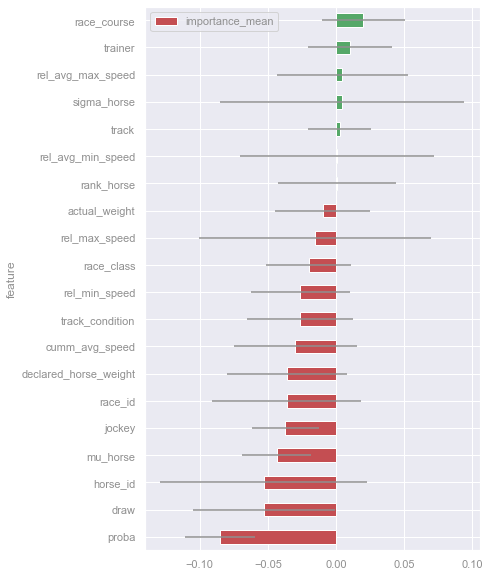

In [820]:
from lofo import LOFOImportance, Dataset, plot_importance
from sklearn.model_selection import KFold

# define the validation scheme
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# define the binary target and the features
dataset = Dataset(df=df_2, target=target, features=used_cols)

# define the validation scheme and scorer.
lofo_imp = LOFOImportance(dataset, cv=cv, model=model, scoring="precision", n_jobs=-1)

# get the mean and standard deviation of the importances in pandas format
importance_df = lofo_imp.get_importance()

# plot the means and standard deviations of the importances
plot_importance(importance_df, figsize=(6, 10))

In [825]:
GBtree = importance_df

In [826]:
importance_df['importance_abs']= np.abs(importance_df['importance_mean'])

In [827]:
importance_df['importance_norm']=importance_df['importance_abs']/importance_df['importance_abs'].sum()
importance_df['importance_norm'].sum()

1.0

In [857]:
importance=importance_df.sort_values(by='importance_norm', ascending=False)['importance_norm'].tolist()
feature=importance_df.sort_values(by='importance_norm', ascending=False)['feature'].tolist()
feature[0] = 'win_probability'
print(list(feature))

['win_probability', 'draw', 'horse_id', 'mu_horse', 'jockey', 'race_id', 'declared_horse_weight', 'cumm_avg_speed', 'track_condition', 'rel_min_speed', 'race_course', 'race_class', 'rel_max_speed', 'trainer', 'actual_weight', 'rel_avg_max_speed', 'sigma_horse', 'track', 'rel_avg_min_speed', 'rank_horse']


In [886]:
# 100*np.array(importance)

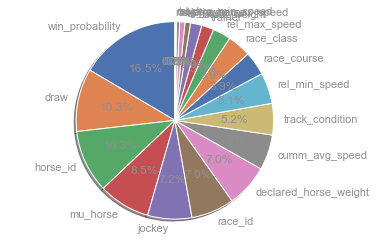

In [858]:
# import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'win_probability', 'draw', 'horse_id', 'mu_horse', 'jockey', 'race_id', 'declared_horse_weight', 'cumm_avg_speed', 'track_condition', 'rel_min_speed', 'race_course', 'race_class', 'rel_max_speed', 'trainer', 'actual_weight', 'rel_avg_max_speed', 'sigma_horse', 'track', 'rel_avg_min_speed', 'rank_horse'
#'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = 100*np.array(importance) #[15, 30, 45, 10]
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [873]:
labels = ['win_probability', 'draw', 'horse_id', 'mu_horse', 'jockey',
          'race_id', 'declared_horse_weight', 'cumm_avg_speed', 'track_condition', 
          'rel_min_speed', 'race_course', 'race_class', 'other']
sizes = [16.5079231 , 10.30193769, 10.29292648,  8.45706925,  7.22506613,
        7.04853711,  7.00248813,  5.77908663,  5.1534862 ,  5.06934982,
        3.9015608 ,  3.89050221, 9.37006646]
len(labels),len(sizes)

(13, 13)

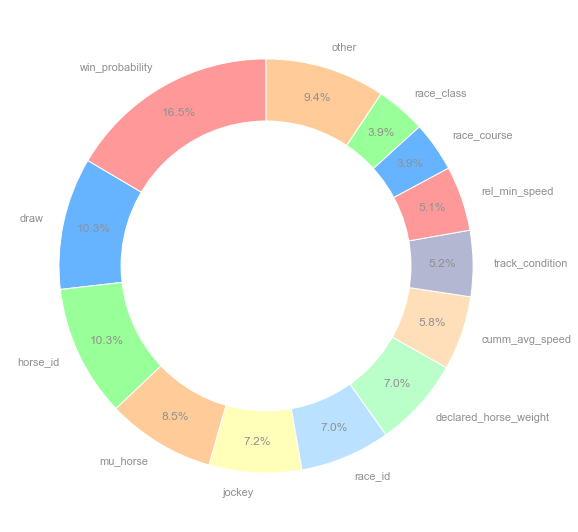

In [885]:
# Pie chart

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffffba', '#bae1ff',
          '#baffc9', '#ffdfba','#b3b7d2']
#explsion
#explode = (0.05,0.05,0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85) 
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
fig.set_size_inches(8,8)
plt.show()